<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#E-commerce-Retail-Sales-as-a-Percent-of-Total-Sales-the-USA" data-toc-modified-id="E-commerce-Retail-Sales-as-a-Percent-of-Total-Sales-the-USA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>E-commerce Retail Sales as a Percent of Total Sales the USA</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load dataset</a></span><ul class="toc-item"><li><span><a href="#Check-date-ranges" data-toc-modified-id="Check-date-ranges-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Check date ranges</a></span></li></ul></li><li><span><a href="#Plot-and-explore-the-data" data-toc-modified-id="Plot-and-explore-the-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot and explore the data</a></span><ul class="toc-item"><li><span><a href="#Seasonal-decompose" data-toc-modified-id="Seasonal-decompose-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Seasonal decompose</a></span></li><li><span><a href="#Square-root-transformation-of-Y" data-toc-modified-id="Square-root-transformation-of-Y-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Square-root transformation of Y</a></span></li><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Stationarity</a></span><ul class="toc-item"><li><span><a href="#Test-for-stationarity" data-toc-modified-id="Test-for-stationarity-1.3.3.1"><span class="toc-item-num">1.3.3.1&nbsp;&nbsp;</span>Test for stationarity</a></span></li></ul></li><li><span><a href="#Autocorrelation-and-partial-autocorrelation" data-toc-modified-id="Autocorrelation-and-partial-autocorrelation-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Autocorrelation and partial autocorrelation</a></span><ul class="toc-item"><li><span><a href="#Lag-plots" data-toc-modified-id="Lag-plots-1.3.4.1"><span class="toc-item-num">1.3.4.1&nbsp;&nbsp;</span>Lag plots</a></span></li><li><span><a href="#Plot-ACF-and-PACF" data-toc-modified-id="Plot-ACF-and-PACF-1.3.4.2"><span class="toc-item-num">1.3.4.2&nbsp;&nbsp;</span>Plot ACF and PACF</a></span></li></ul></li></ul></li><li><span><a href="#Build-prediction-models" data-toc-modified-id="Build-prediction-models-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Build prediction models</a></span><ul class="toc-item"><li><span><a href="#Split-into-train-/-test-datasets" data-toc-modified-id="Split-into-train-/-test-datasets-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Split into train / test datasets</a></span></li><li><span><a href="#SARIMA-model" data-toc-modified-id="SARIMA-model-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>SARIMA model</a></span><ul class="toc-item"><li><span><a href="#Evaluate-the-model" data-toc-modified-id="Evaluate-the-model-1.4.2.1"><span class="toc-item-num">1.4.2.1&nbsp;&nbsp;</span>Evaluate the model</a></span></li></ul></li><li><span><a href="#Holt-Winters-model" data-toc-modified-id="Holt-Winters-model-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Holt Winters model</a></span></li><li><span><a href="#Evaluate-the-models" data-toc-modified-id="Evaluate-the-models-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Evaluate the models</a></span></li></ul></li><li><span><a href="#2020-Forecast" data-toc-modified-id="2020-Forecast-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>2020 Forecast</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

# E-commerce Retail Sales as a Percent of Total Sales the USA

We've previously seen that E-commerce in the USA has grown exponentially since end of 1999. 
* What is the share of E-commerce Retail Sales in the Total Sales?
* Has its share grown faster than Total Sales?
* Can we predict the share of E-commerce Retail Sales as a Percent of Total Sales?

For this project, we study the E-commerce Retail Sales as a Percent of Total Sales.  The E-commerce Retail Sales is a measure of U.S. "sales of goods and services where the buyer places an order, or the price and terms of the sale are negotiated over an Internet, mobile device (M-commerce), extranet, Electronic Data Interchange (EDI) network, electronic mail, or other comparable online system. Payment may or may not be made online."

The dataset is in percent, quarterly, not seasonally adjusted. The values are provided from Q4 1999 to Q1 2020.


Source: https://fred.stlouisfed.org/series/ECOMPCTNSA

## Import libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import os
path = os.getcwd()

In [3]:
# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pandas.plotting import lag_plot

In [5]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Load dataset

In [7]:
# lod dataset
df = pd.read_csv(path+'/../2_prepared_data/ECOMPCTNSA.csv', index_col = "DATE", parse_dates = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 1999-10-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ECOMPCTNSA  82 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [9]:
df.head()

,ECOMPCTNSA
DATE,
1999-10-01,0.7
2000-01-01,0.8
2000-04-01,0.8
2000-07-01,0.9
2000-10-01,1.2


In [10]:
df.tail()

,ECOMPCTNSA
DATE,
2019-01-01,10.3
2019-04-01,10.1
2019-07-01,10.6
2019-10-01,12.7
2020-01-01,11.5


In [11]:
# check index frequency
df.index

DatetimeIndex(['1999-10-01', '2000-01-01', '2000-04-01', '2000-07-01',
               '2000-10-01', '2001-01-01', '2001-04-01', '2001-07-01',
               '2001-10-01', '2002-01-01', '2002-04-01', '2002-07-01',
               '2002-10-01', '2003-01-01', '2003-04-01', '2003-07-01',
               '2003-10-01', '2004-01-01', '2004-04-01', '2004-07-01',
               '2004-10-01', '2005-01-01', '2005-04-01', '2005-07-01',
               '2005-10-01', '2006-01-01', '2006-04-01', '2006-07-01',
               '2006-10-01', '2007-01-01', '2007-04-01', '2007-07-01',
               '2007-10-01', '2008-01-01', '2008-04-01', '2008-07-01',
               '2008-10-01', '2009-01-01', '2009-04-01', '2009-07-01',
               '2009-10-01', '2010-01-01', '2010-04-01', '2010-07-01',
               '2010-10-01', '2011-01-01', '2011-04-01', '2011-07-01',
               '2011-10-01', '2012-01-01', '2012-04-01', '2012-07-01',
               '2012-10-01', '2013-01-01', '2013-04-01', '2013-07-01',
      

In [12]:
# set index frequency to quarterly
df.index.freq = 'QS'

###  Check date ranges

In [13]:
# check for duplicates
len(set(df.index)) == len(df.index)

True

There is no duplicate indice

In [14]:
df.index[0]

Timestamp('1999-10-01 00:00:00', freq='QS-JAN')

In [15]:
df.index[len(df)-1]

Timestamp('2020-01-01 00:00:00', freq='QS-JAN')

In [16]:
idx = pd.date_range(df.index[0],df.index[len(df)-1], freq = 'QS')

In [17]:
idx

DatetimeIndex(['1999-10-01', '2000-01-01', '2000-04-01', '2000-07-01',
               '2000-10-01', '2001-01-01', '2001-04-01', '2001-07-01',
               '2001-10-01', '2002-01-01', '2002-04-01', '2002-07-01',
               '2002-10-01', '2003-01-01', '2003-04-01', '2003-07-01',
               '2003-10-01', '2004-01-01', '2004-04-01', '2004-07-01',
               '2004-10-01', '2005-01-01', '2005-04-01', '2005-07-01',
               '2005-10-01', '2006-01-01', '2006-04-01', '2006-07-01',
               '2006-10-01', '2007-01-01', '2007-04-01', '2007-07-01',
               '2007-10-01', '2008-01-01', '2008-04-01', '2008-07-01',
               '2008-10-01', '2009-01-01', '2009-04-01', '2009-07-01',
               '2009-10-01', '2010-01-01', '2010-04-01', '2010-07-01',
               '2010-10-01', '2011-01-01', '2011-04-01', '2011-07-01',
               '2011-10-01', '2012-01-01', '2012-04-01', '2012-07-01',
               '2012-10-01', '2013-01-01', '2013-04-01', '2013-07-01',
      

In [18]:
len(df) == len(idx)

True

There is no missing value for the studied period.

## Plot and explore the data

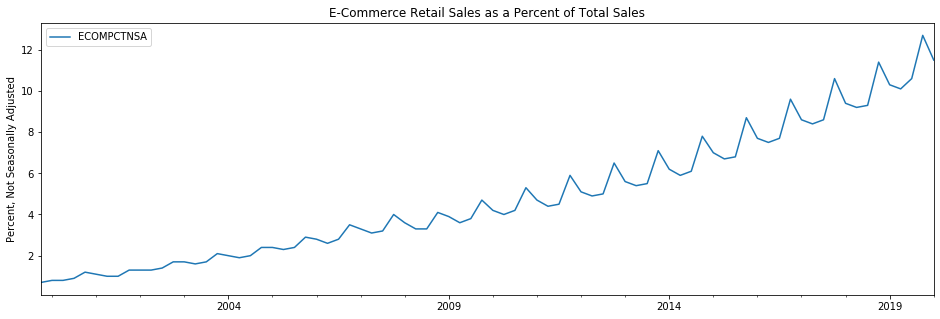

In [19]:
title = 'E-Commerce Retail Sales as a Percent of Total Sales'
ylabel = 'Percent, Not Seasonally Adjusted'
xlabel = ''


ax = df.plot(figsize = (16,5), title = title)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel=xlabel, ylabel=ylabel);

We observe a trend and variations that look seasonal, especially after 2005. Let's have a look at the period before 2005, as the overall scale might have somewhat hidden seasonal variations. And then, let's check using seasonal decomposition.

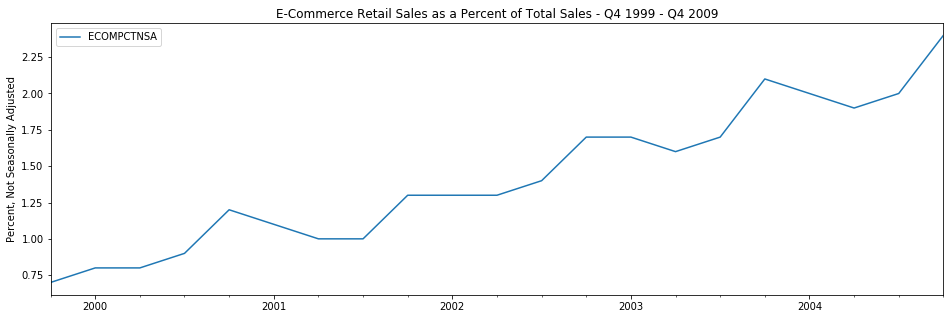

In [20]:
title = 'E-Commerce Retail Sales as a Percent of Total Sales - Q4 1999 - Q4 2009'
ylabel = 'Percent, Not Seasonally Adjusted'
xlabel = ''


ax = df.loc['1999-10-01':'2004-10-01'].plot(figsize = (16,5), title = title)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Seasonal variations can also be observed before 2005.

### Seasonal decompose

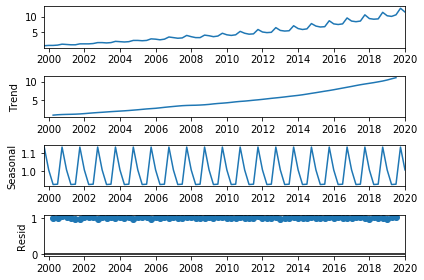

In [21]:
seasonal_decompose(df,model = 'mul').plot();

As expected, there is an overall increasing trend, with a steeper increase with time.

The trend does not look linear, but maybe quadratic. We'll transform the dependent variable in order to check.

We also observe an annual seasonality, with a peak of sales in Quarter 4. 

### Square-root transformation of Y 

Since the trend looks quadratic, we transform the dependent variable using the square-root function.

In [22]:
df['sqrt-ECOMPCTNSA'] = np.sqrt(df['ECOMPCTNSA'])

In [23]:
df.head()

,ECOMPCTNSA,sqrt-ECOMPCTNSA
DATE,,
1999-10-01,0.7,0.836660
2000-01-01,0.8,0.894427
2000-04-01,0.8,0.894427
2000-07-01,0.9,0.948683
2000-10-01,1.2,1.095445


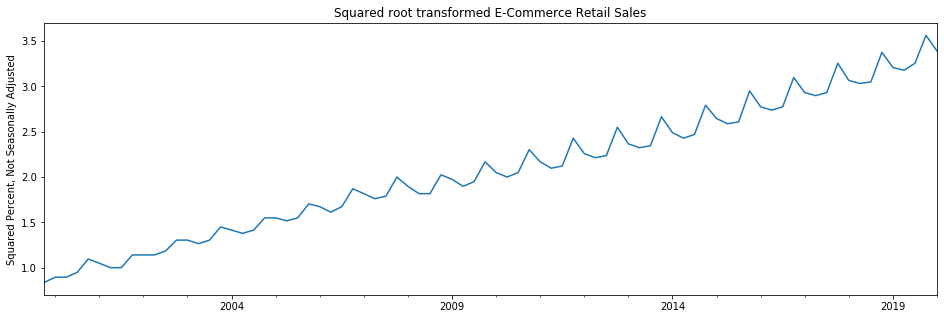

In [24]:
title = 'Squared root transformed E-Commerce Retail Sales'
ylabel = 'Squared Percent, Not Seasonally Adjusted'
xlabel = ''


ax = df['sqrt-ECOMPCTNSA'].plot(figsize = (16,5), title = title)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel=xlabel, ylabel=ylabel);

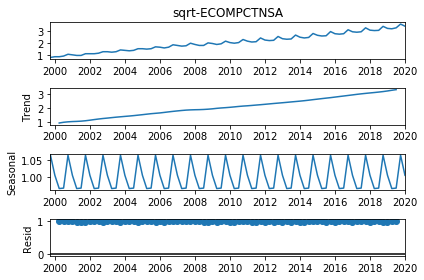

In [25]:
# Let's have a look at the seasonal decomposition of this transformed series
seasonal_decompose(df['sqrt-ECOMPCTNSA'], model = 'mul').plot();

The share of E-commerce sales has followed a quadratic growth since end of 1999, rising from less than 0.7% in Q4 1999 to 11.5% in Q1 2020.

### Stationarity

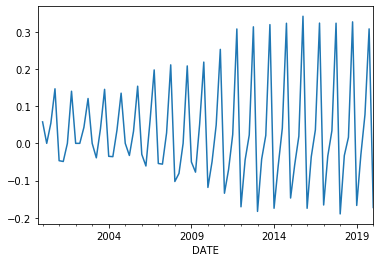

In [26]:
# let's look at the first order differenced data
df['sqrt-ECOMPCTNSA'].diff().plot();

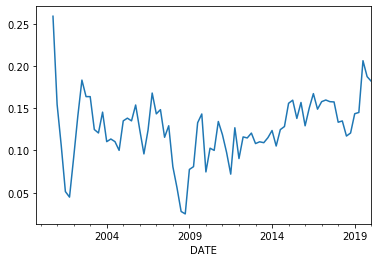

In [27]:
# let's look at the seasonally differenced data
df['sqrt-ECOMPCTNSA'].diff(4).plot();

This plot highlights a change of pattern (trend) in 2008-beginning of 2009.

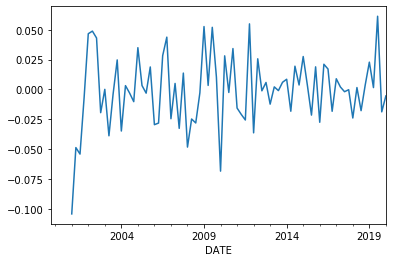

In [28]:
# let's look at the seasonally and first order differenced data
df['sqrt-ECOMPCTNSA'].diff(4).diff().plot();

#### Test for stationarity

In [29]:
# let's define a function to apply the Augmented Dickey-Fueller test to test data stationarity
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [30]:
adf_test(df['sqrt-ECOMPCTNSA'], 'Squared root transformed E-Commerce Retail Sales')

Augmented Dickey-Fuller Test: Squared root transformed E-Commerce Retail Sales
ADF test statistic       2.368551
p-value                  0.998995
# lags used              4.000000
# observations          77.000000
critical value (1%)     -3.518281
critical value (5%)     -2.899878
critical value (10%)    -2.587223
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [31]:
adf_test(df['sqrt-ECOMPCTNSA'].diff().dropna(), 'First order differenced Squared root transformed E-Commerce Retail Sales')

Augmented Dickey-Fuller Test: First order differenced Squared root transformed E-Commerce Retail Sales
ADF test statistic      -4.550441
p-value                  0.000159
# lags used              3.000000
# observations          77.000000
critical value (1%)     -3.518281
critical value (5%)     -2.899878
critical value (10%)    -2.587223
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [32]:
adf_test(df['sqrt-ECOMPCTNSA'].diff(4).dropna(), 'Seasonally differenced Squared root transformed E-Commerce Retail Sales')

Augmented Dickey-Fuller Test: Seasonally differenced Squared root transformed E-Commerce Retail Sales
ADF test statistic      -4.731474
p-value                  0.000073
# lags used              0.000000
# observations          77.000000
critical value (1%)     -3.518281
critical value (5%)     -2.899878
critical value (10%)    -2.587223
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [33]:
adf_test(df['sqrt-ECOMPCTNSA'].diff(4).diff(1).dropna(),
         'Seasonally and first order differenced Squared root transformed E-Commerce Retail Sales')

Augmented Dickey-Fuller Test: Seasonally and first order differenced Squared root transformed E-Commerce Retail Sales
ADF test statistic     -9.213545e+00
p-value                 1.859873e-15
# lags used             0.000000e+00
# observations          7.600000e+01
critical value (1%)    -3.519481e+00
critical value (5%)    -2.900395e+00
critical value (10%)   -2.587498e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Autocorrelation and partial autocorrelation

#### Lag plots

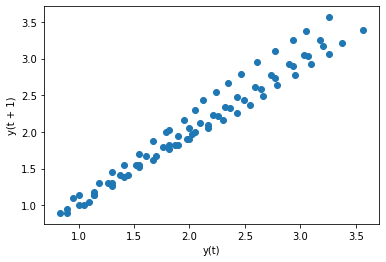

In [34]:
lag_plot(df['sqrt-ECOMPCTNSA']);

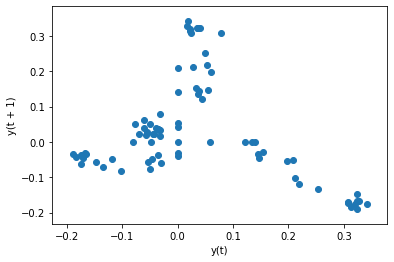

In [35]:
lag_plot(df['sqrt-ECOMPCTNSA'].diff());

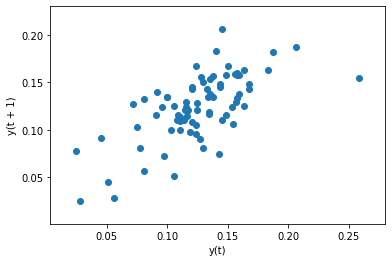

In [36]:
lag_plot(df['sqrt-ECOMPCTNSA'].diff(4));

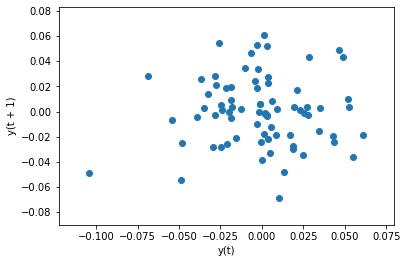

In [37]:
lag_plot(df['sqrt-ECOMPCTNSA'].diff(4).diff());

#### Plot ACF and PACF

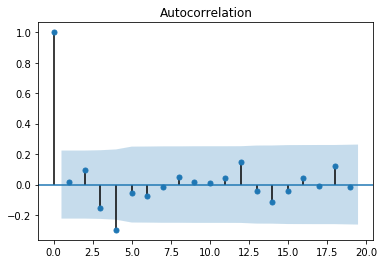

In [38]:
plot_acf(df['sqrt-ECOMPCTNSA'].diff(4).diff().dropna());

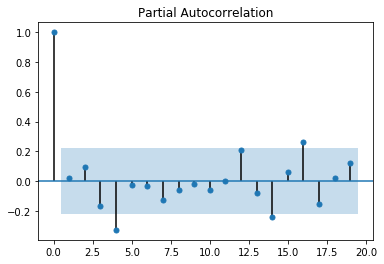

In [39]:
plot_pacf(df['sqrt-ECOMPCTNSA'].diff(4).diff().dropna());

## Build prediction models

We'll work on our transformed dependent variable. Since seasonality is observed, we'll try a SARIMA model first.

### Split into train / test datasets

In [40]:
len(df)

82

In [41]:
train, test = df.iloc[:65], df.iloc[65:]

### SARIMA model

In [42]:
auto_arima(df['sqrt-ECOMPCTNSA'], start_p=0, start_q=0, max_p=6, max_q=6,
                               seasonal=True, m=4,
                          start_P=0, max_P=6, start_Q=0, max_Q=6, 
                          d=None, D=1, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True
            ).summary()

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 4); AIC=-285.642, BIC=-280.929, Fit time=0.056 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 4); AIC=-337.580, BIC=-328.153, Fit time=0.209 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 4); AIC=-314.197, BIC=-304.770, Fit time=0.194 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 4); AIC=-330.096, BIC=-323.026, Fit time=0.134 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 0, 4); AIC=-335.628, BIC=-323.845, Fit time=0.279 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 1, 4); AIC=-318.146, BIC=-306.363, Fit time=0.268 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 1, 4); AIC=-334.705, BIC=-320.565, Fit time=0.180 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 1, 0, 4); AIC=-284.190, BIC=-277.120, Fit time=0.194 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(1, 1, 0, 4); AIC=-335.564, BIC=-323.780, Fit time=0.240 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_o

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   82
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 4)   Log Likelihood                 172.790
Date:                           Mon, 25 May 2020   AIC                           -337.580
Time:                                   15:52:15   BIC                           -328.153
Sample:                                        0   HQIC                          -333.806
                                            - 82                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0403      0.012      3.503      0.000       0.018       0.063
ar.L1          0.7785      0.059     13.173      0.000       0.663       0.894
ar.S.L4       -0.4018      0.106     -3.797      0.000      -0.609      -0.194
sigma2         0.0007   9.96e-05      6.874      0.000       0.000       0.001
===================================================================================
Ljung-Box (Q):                       43.80   Jarque-Bera (JB):                 3.34
Prob(Q):                              0.31   Prob(JB):                         0.19
Heteroskedasticity (H):               0.35   Skew:                             0.23
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
# let's build our SARIMA model using the suggested orders from <tt>auto_arima</tt>
model = SARIMAX(train['sqrt-ECOMPCTNSA'], order = (1, 0, 0),
                seasonal_order= (1, 1, 0, 4), enforce_invertibility=False)

In [44]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                   sqrt-ECOMPCTNSA   No. Observations:                   65
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 4)   Log Likelihood                 126.031
Date:                           Mon, 25 May 2020   AIC                           -246.062
Time:                                   15:52:15   BIC                           -239.729
Sample:                               10-01-1999   HQIC                          -243.580
                                    - 10-01-2015                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9910      0.011     91.994      0.000       0.970       1.012
ar.S.L4       -0.3631      0.120     -3.014      0.003      -0.599      -0.127
sigma2         0.0009      0.000      5.618      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       38.31   Jarque-Bera (JB):                 1.90
Prob(Q):                              0.55   Prob(JB):                         0.39
Heteroskedasticity (H):               0.65   Skew:                            -0.40
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
# now, let's make some predictions using our fitted model
start = len(train)
end = len(train) + len(test) - 1

In [46]:
predictions_sqrt = results.predict(start = start, end = end, 
                                 dynamic = False,
                                 typ = 'lev').rename('sqrt-SARIMA(1, 0, 0)x(1, 1, 0, 4) predictions')

In [47]:
# we transformed back the predictions using the quadratic function
predictions = predictions_sqrt **2

In [48]:
predictions.head()

2016-01-01    7.787782
2016-04-01    7.453958
2016-07-01    7.592634
2016-10-01    9.540286
2017-01-01    8.598628
Freq: QS-JAN, Name: sqrt-SARIMA(1, 0, 0)x(1, 1, 0, 4) predictions, dtype: float64

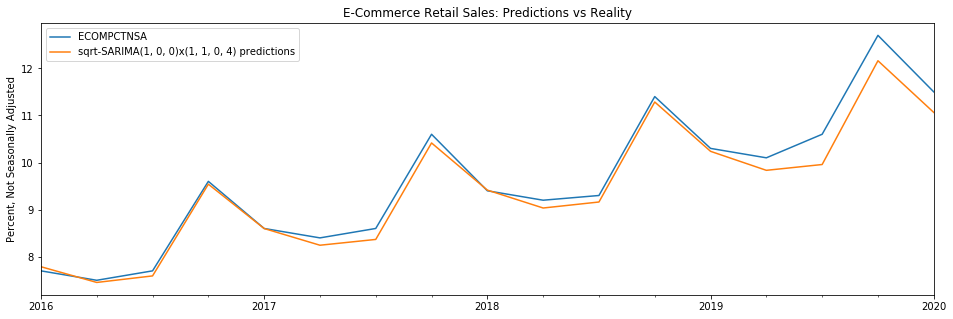

In [49]:
# let's plot the results
title = 'E-Commerce Retail Sales: Predictions vs Reality'
ylabel = 'Percent, Not Seasonally Adjusted'
xlabel = ''


ax = test['ECOMPCTNSA'].plot(figsize = (16,5), title = title, legend = True)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel=xlabel, ylabel=ylabel);
predictions.plot(legend = True);

#### Evaluate the model

In [50]:
error1 = mean_absolute_error(test['ECOMPCTNSA'], predictions)

error2 = np.sqrt(mean_squared_error(test['ECOMPCTNSA'], predictions))

print(f'sqrt-SARIMA(1, 0, 0)x(1, 1, 0, 4) - MAE: {error1:11.10}')
print(f'sqrt-SARIMA(1, 0, 0)x(1, 1, 0, 4) - RMSE: {error2:11.10}')

sqrt-SARIMA(1, 0, 0)x(1, 1, 0, 4) - MAE: 0.1914024939
sqrt-SARIMA(1, 0, 0)x(1, 1, 0, 4) - RMSE: 0.2618025559


Our root mean squared error is 0.26% with the SARIMA(1, 0, 0)x(1, 1, 0, 4) model applied on the square-root transformed dependent variable. Let's check if we can outperform this model using a Triple Exponential Smoothing model.

### Holt Winters model

In [51]:
fittedmodel_TESmix = ExponentialSmoothing(train['sqrt-ECOMPCTNSA'], 
                                 trend = 'add',
                                 seasonal = 'mul', seasonal_periods=4).fit()

//anaconda/envs/tsa/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [52]:
predictions_TESmix = fittedmodel_TESmix.forecast(17).rename('sqrtTESmix4 predictions')

In [53]:
predictions2 = predictions_TESmix **2

In [54]:
predictions2.head()

2016-01-01    7.695345
2016-04-01    7.333848
2016-07-01    7.464238
2016-10-01    9.542052
2017-01-01    8.443110
Freq: QS-JAN, Name: sqrtTESmix4 predictions, dtype: float64

In [55]:
# let's also try with another TES model
fittedmodel_TESadd = ExponentialSmoothing(train['sqrt-ECOMPCTNSA'], 
                                 trend = 'add',
                                 seasonal = 'add', seasonal_periods=4).fit()

//anaconda/envs/tsa/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [56]:
predictions_TESadd = fittedmodel_TESadd.forecast(17).rename('sqrtTESadd4 predictions')

In [57]:
predictions3 = predictions_TESadd **2

In [58]:
predictions3.head()

2016-01-01    7.693835
2016-04-01    7.343829
2016-07-01    7.489880
2016-10-01    9.363805
2017-01-01    8.369200
Freq: QS-JAN, Name: sqrtTESadd4 predictions, dtype: float64

In [59]:
# let's also try with another TES model
fittedmodel_TESmul = ExponentialSmoothing(train['sqrt-ECOMPCTNSA'], 
                                 trend = 'mul',
                                 seasonal = 'mul', seasonal_periods=4).fit()

//anaconda/envs/tsa/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [60]:
predictions_TESmul = fittedmodel_TESmul.forecast(17).rename('sqrtTESmul4 predictions')

In [61]:
predictions4 = predictions_TESmul **2

In [62]:
predictions4.head()

2016-01-01    7.755651
2016-04-01    7.402141
2016-07-01    7.553360
2016-10-01    9.730947
2017-01-01    8.624402
Freq: QS-JAN, Name: sqrtTESmul4 predictions, dtype: float64

In [63]:
# let's also try with another TES model
fittedmodel_TESmix2 = ExponentialSmoothing(train['sqrt-ECOMPCTNSA'], 
                                 trend = 'mul',
                                 seasonal = 'add', seasonal_periods=4).fit()

//anaconda/envs/tsa/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [64]:
predictions_TESmix2 = fittedmodel_TESmix2.forecast(17).rename('sqrtTESmix2-4 predictions')

In [65]:
predictions5 = predictions_TESmix2 **2

In [66]:
predictions5.head()

2016-01-01    7.729449
2016-04-01    7.402919
2016-07-01    7.583820
2016-10-01    9.521553
2017-01-01    8.542735
Freq: QS-JAN, Name: sqrtTESmix2-4 predictions, dtype: float64

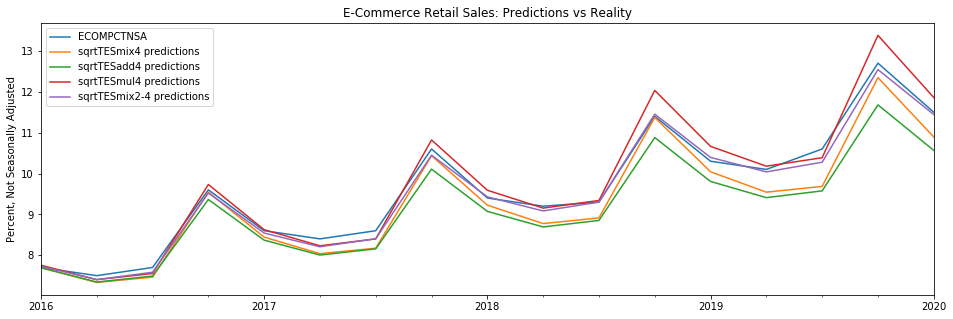

In [67]:
# let's plot the results
title = 'E-Commerce Retail Sales: Predictions vs Reality'
ylabel = 'Percent, Not Seasonally Adjusted'
xlabel = ''


ax = test['ECOMPCTNSA'].plot(figsize = (16,5), title = title, legend = True)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel=xlabel, ylabel=ylabel);
predictions2.plot(legend = True);
predictions3.plot(legend = True);
predictions4.plot(legend = True);
predictions5.plot(legend = True);

The second mixed Triple Exponential Smoothing (multiplicative trend and additive seasonality) seems the be the best fit for our data. Let's confirm this by evaluating these models.

### Evaluate the models

In [68]:
model_list = ['sqrt-SARIMA(1, 0, 0)x(1, 1, 0, 4)',
                'sqrtTESmix4 predictions',
             'sqrtTESadd4 predictions',
              'sqrtTESmul4 predictions',
             'sqrtTESmix2-4 predictions']

In [69]:
predictions_list = [predictions, predictions2, predictions3, predictions4, predictions5]

In [70]:
MAE = [mean_absolute_error(test['ECOMPCTNSA'],p) for p in predictions_list]

In [71]:
RMSE = [np.sqrt(mean_squared_error(test['ECOMPCTNSA'],p)) for p in predictions_list]

In [72]:
RMSE

[0.2618025559378044,
 0.38504785322171314,
 0.5582031291580081,
 0.2857311451189302,
 0.13154973754224217]

In [73]:
eval_df = pd.DataFrame(data = list(zip(MAE, RMSE)), index = model_list, columns = ['MAE', 'RMSE'])

In [74]:
eval_df.head()

,MAE,RMSE
"sqrt-SARIMA(1, 0, 0)x(1, 1, 0, 4)",0.191402,0.261803
sqrtTESmix4 predictions,0.310569,0.385048
sqrtTESadd4 predictions,0.478846,0.558203
sqrtTESmul4 predictions,0.214905,0.285731
sqrtTESmix2-4 predictions,0.106378,0.131550


The evaluation metrics confirm that the second mixed Triple Exponential Smoothing model (multiplicative trend and additive seasonality) applied on our transformed Y performs best. It also outperforms the SARIMA(1, 0, 0)x(1, 1, 0, 4) model applied on the transformed variable. We'll then keep the best Triple Exponential Smoothing model to make our forecast for 2020.

## 2020 Forecast

In [75]:
# We fit our model on the whole dataset
fittedmodel_final = ExponentialSmoothing(df['sqrt-ECOMPCTNSA'], 
                                 trend = 'mul',
                                 seasonal = 'add', seasonal_periods=4).fit()

//anaconda/envs/tsa/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [76]:
fcast_sqrt_final = fittedmodel_final.forecast(3).rename('2020 Forecast')

In [77]:
fcast = fcast_sqrt_final ** 2

In [78]:
fcast

2020-04-01    11.344866
2020-07-01    11.713531
2020-10-01    13.930400
Freq: QS-JAN, Name: 2020 Forecast, dtype: float64

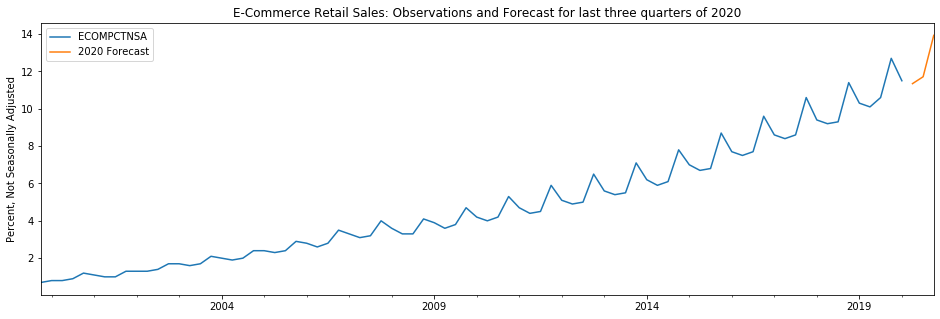

In [79]:
# let's plot the data and the 2020 forecast
title = 'E-Commerce Retail Sales: Observations and Forecast for last three quarters of 2020'
ylabel = 'Percent, Not Seasonally Adjusted'
xlabel = ''


ax = df['ECOMPCTNSA'].plot(figsize = (16,5), title = title, legend = True)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel=xlabel, ylabel=ylabel);
fcast.plot(legend = True);

## Conclusion
* The share of E-commerce Retail Sales in the Total Sales has increased quadratically since end of 1999.
* This share has seasonal fluctuations with higher shares observed in Quarters 4.
* Up to the beginning of 2020, we were able to make a prediction of this share.
    * We've tested two types of models: SARIMA and Triple Exponential Smoothing
    * The best performing model is a Triple Exponential Smoothing model
* The impact of COVID-19 pandemic might change the pattern observed so far, with a sharper increase of the share of E-commerce in the total share. The forecast for the last 3 quarters of 2020 could be used in a business as usual scenario.